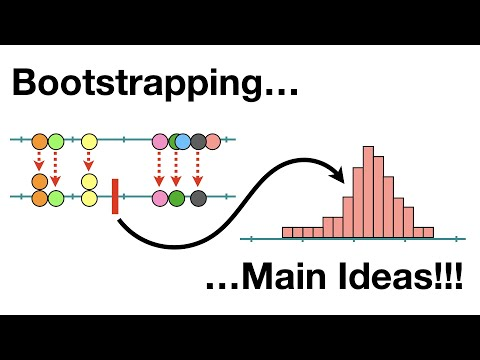

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# Q1.
The standard deviation refers to how spread out the values are, or how much the data varies. Meanwhile, the standard error of the mean (SEM) measures how much the sample mean can vary from the true population mean. So while standard deviation measures the spread of the data points, standard error of the mean measures the accuracy of the sample mean. As a result the SEM decreases as the sample size increases, while SD is independent of sample size.

# Q2.

There are 4 steps to this process. First you need to find the average (mean) of the sample data. Then the SEM (standard error of the mean) needs to be calculated(sd/(n)^0.5), after which the margin of error needs to be calculated (multiply SEM by 1.96). Finally, the interval can be calculated by adding and subtracting this margin of error from the mean to create the confidence interval.

# Q3 
(using boostrapped means)
The data can be resampled many times (eg 20,000) and the mean can be calculated from this.These means can then be arranged in ascedning order. After this we would like to determine the percentiles by using the np.quantile to find the 2.5th and 97.5th percentiles of the sorted bootstrapped means.This represents the upper and lower bound of the 95% confidence interval. This function allows us to mark the edges of our confidence interval, and between these two values are the centeral 95% of our boostrapped means.


# Summary

Here’s a summary of what we’ve covered:

Standard Deviation (SD): Measures how spread out the data points are around the mean.
Standard Error of the Mean (SEM): Indicates how much the sample mean is expected to vary from the true population mean. It’s calculated by dividing the SD by the square root of the sample size.
Creating a 95% Confidence Interval Using SEM:
Calculate the sample mean.
Compute the SEM.
Multiply the SEM by 1.96 to get the margin of error.
Add and subtract this margin from the sample mean to get the interval.
Bootstrapped Confidence Interval:
Generate many bootstrapped sample means.
Sort these means.
Use np.quantile to find the 2.5th and 97.5th percentiles.
These percentiles form the lower and upper bounds of the 95% confidence interval.
Why 2.5% and 97.5%: These points mark the edges of the middle 95% of the bootstrapped means, capturing the central range where the true population mean is likely to fall.


# Q4.

In [19]:
import numpy as np

# Sample data (pretty self explanatory)
sample_data = np.array([5, 7, 8, 5, 6, 7, 8, 9, 6, 5, 7, 8, 6, 7, 8])

# we are to create many bootstrap samples, so 10,000 have been used here
n_bootstraps = 10000

# This function calulates the mean. np.median can be also be used by passing it as the 
#"statistic_func" (this has been done below)
def bootstrap_statistic(data, n_bootstraps, statistic_func):
    bootstrapped_stats = []
    for _ in range(n_bootstraps):
        # Resample with replacement
        resampled_data = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (mean or median)
        stat = statistic_func(resampled_data)
        bootstrapped_stats.append(stat)
    return np.array(bootstrapped_stats)

# This uses the above function to calculate the MEAN.
boot_means = bootstrap_statistic(sample_data, n_bootstraps, np.mean)

# np.quantile is used to find the "lower bound" and "upper bound" as discussed in the previous
# question which essentially represents the start and end of the confidence intervals (2.5% and 97.5%)
lower_bound = np.quantile(boot_means, 0.025)
upper_bound = np.quantile(boot_means, 0.975)

# Output the 95% confidence interval for the mean using the afformentioned upper and lower bound.
print(f"95% Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")

# The function can now be adjusted to calculate any other statistic. Over here, the median is shown.
boot_medians = bootstrap_statistic(sample_data, n_bootstraps, np.median)
lower_bound_median = np.quantile(boot_medians, 0.025)
upper_bound_median = np.quantile(boot_medians, 0.975)

# Output the 95% confidence interval for the median
print(f"95% Confidence Interval for the Median: ({lower_bound_median}, {upper_bound_median})")


95% Confidence Interval for the Mean: (6.2, 7.4)
95% Confidence Interval for the Median: (6.0, 8.0)


# Pre-Class Summary 2
Here’s a summary of what we’ve covered since the last summary:

Creating a 95% Bootstrapped Confidence Interval:
Generate Bootstrapped Means: Resample your data many times and calculate the mean for each resample.
Sort the Means: Arrange these means in ascending order.
Find Percentiles: Use np.quantile to find the 2.5th and 97.5th percentiles, which form the bounds of the 95% confidence interval.
Why Use 2.5% and 97.5%:
These percentiles mark the edges of the middle 95% of the bootstrapped means, capturing the central range where the true population mean is likely to fall.
Python Code Example:
Provided code to calculate a 95% bootstrapped confidence interval for the population mean.
Explained how to modify the code to calculate the confidence interval for the population median by changing the statistic function from np.mean to np.median.
Detailed Code Explanation:
Function Definition: The bootstrap_statistic function resamples the data and calculates the desired statistic (mean or median).
Calling the Function: Demonstrated how to call the function with np.median to calculate the bootstrapped medians and their confidence interval.


# Q5

The population parameter is the true value we are trying to estimate (eg. actual mean of the population) using our sample data, which forms a sample statistic.The confidence interval is then calculated using the sample data and represents where we think the true population parameter lies. In short, the sample statistis is our estimate based on our sample data while the population parameter is the true value, so it is important to distinguish these two.

summary:
I have lost the chat for this part of the assignment but I basically just asked the chatbot to keep simplifying its answer till I understood it.

# Q6

#### Hey Adeel, I know you're incredibly skilled and all-knowing in the field of Data science and Staistical Reasoning. Can you please explain boostrapping to me?
Sure. Boostrapping simulates the process of repeating an experiment multiple times. You can use it by randomly sampling data points from your experiment without replacement.
#### Wait what does that mean?
This means you can use the same data point twice. For example, lets say we want to predict the average test scores from Professor Scott's midterm but we only have the test scores of 30 people in our study group. We can pick random tests from a pile and then put them back until we have 30 test scores written down.
#### Thats cool and all but that midterm was really bad though, wasnt it?
Yeah, I know.. Anyways, you can repeat this process of creating a set of 30 scores a lot of times, like even 10,000.
#### WOAH, thats almost how many hours it takes to complete a single STA130 hw.
YEAH, and then you can use this data to create a statistic, like the average and then plot it on a distribution, like a histogram. So you can not only see the average scores, but also how reliable our dataset of 30 people is. You can do this by checking the varability of data and using confidence intervals.
#### Alright, but what's the purpose of boostrapping in the first place?
Well, bootrapping basically estimates the process of repeating an experiment multiple times, without bearing the cost and time of doing it many times.
#### Oh, so you can make an estimate on data for a huge sample size without the effort required to actually collect it?
Yeah, exactly
#### Amazing! Honestly, I think that midterm was pretty difficult. The average must've been around 50/100.
Well, you can actually test your hypothesis using bootstrapping. We already talked about the sample of 30 students in our study group and how we can create a statistic for it.
#### Oh yeah!
So a statistic we can use here is the average. With all our data, we'll have many, many averages (eg. 10,000) and we can use that to form a distribution. Then, we can check if your guess of 50 is in a range that makes sense. (confidence testing) If it is outside this range, its probably a bad guess.
#### Woah, how do you know all of this? Wait , IS THAT CHATGPT ON YOUR PHONE


# Q7

When the confidence interval covers zero, it means that zero, or null is one of the possibilities, even if it is not the mean. Therefore, we cannot reject one of the possible outcomes and cannot reject the null hypothesis. With this in mind, we can say that if the confidence interval does not cover zero, we can reject a null hypothesis as it not one of the possible outcomes.

# Q8

The following analysis aims to conclude whether the vaccine developed by AliTech is effective or not.

### Null Hypothesis:  
In this context a null hypothesis would mean that the vaccine has no effect on the health of the people who take it. Any change would be due to other factors, such as the health of the consumer.


In [9]:
#LOADING/CREATING THE CSV FILE 
import pandas as pd

# Data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('vaccine_data.csv', index=False)


### Data Visualization

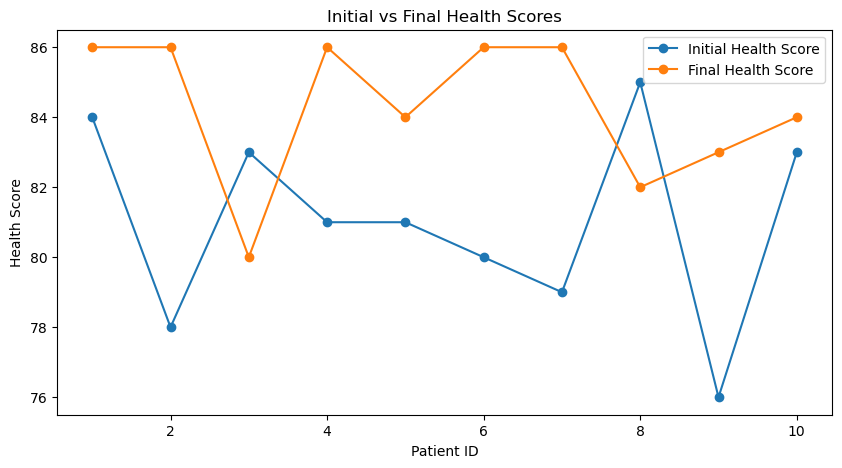

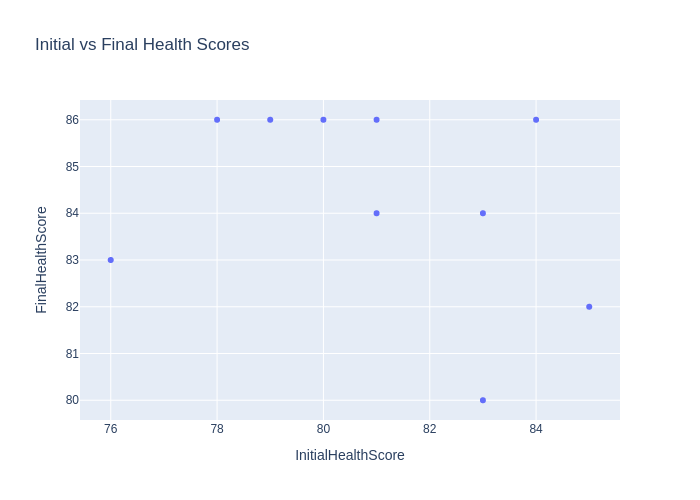

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data
data = pd.read_csv('vaccine_data.csv')

# Plotting the initial and final health scores
plt.figure(figsize=(10, 5))
plt.plot(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', marker='o')
plt.plot(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', marker='o')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores')
plt.legend()
plt.show()

# Example of rendering a Plotly figure as PNG
import plotly.express as px

# Creating a sample Plotly figure
fig = px.scatter(data, x='InitialHealthScore', y='FinalHealthScore', title='Initial vs Final Health Scores')

# Rendering the Plotly figure as PNG
fig.show(renderer="png")


The above graph visualizes the data with initial and final health scores for an initial insight into the data.

### Quantitaitive Analysis

I will now use bootstrapping to analyze the data by repeatedly sampling the data with replacement. It will include the same 4 steps as we have discussed in previous questions.

### Methodology

1. Calculate the difference in health scores for each patient. (between intial and final)
2. Generating a large number (10,000) of bootstrap samples, and then calculate the mean of the difference for each sample.
3. Find the confidence interval for the mean difference. (95% confidence)
4. Checking if the confidence interval includes zero to see if we can reject the null hypothesis. (hypothesis testing)

In [20]:
import numpy as np

# Calculate the difference in health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping
np.random.seed(42)
n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = data['HealthScoreDifference'].sample(frac=1, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

# Calculate the confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
mean_difference = np.mean(bootstrap_means)

print(f'Mean Difference: {mean_difference}')
print(f'95% Confidence Interval: {confidence_interval}')


Mean Difference: 3.3107300000000004
95% Confidence Interval: [0.9 5.6]


### Findings:

Since the confidence interval does not include zero, we can reject the null hypothesis and conclude that the vaccine has a significant effect on improving health scores. This indicates that the vaccine can have a positive affect on improving health scores of patients.

### Further Consideration

Variables such as sample size, age and gender can affect the reliability of the results. Age and gender can skew the results on the effectiveness of the vaccine

### Summary

Problem Introduction: We aimed to determine the effectiveness of AliTech’s new vaccine by analyzing health score data.

Null Hypothesis: We defined the null hypothesis as the vaccine having no effect on health scores.

Data Visualization: We plotted the initial and final health scores of patients to get an initial insight.

Quantitative Analysis: We used bootstrapping to calculate the mean difference in health scores and its 95% confidence interval.

Conclusion: The confidence interval (0.9 to 5.6) did not include zero, allowing us to reject the null hypothesis and conclude that the vaccine significantly improves health scores.

Reproducibility: We ensured the analysis was reproducible by setting a random seed using np.random.seed(42).

Plotly Figures: We included an example of rendering Plotly figures as PNG using fig.show(renderer="png").

# Q9.
No